## Putting It All Together

All the steps in one place

In [154]:
import torch
from torch import nn

import matplotlib.pyplot as plt

In [155]:
# Checking Pytorch Version

torch.__version__

'2.1.1+cu118'

#### Creating Device Agonistic Code

Using a GPU when available and a CPU otherwise

In [156]:
# Agnostic Code Setup

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using Device: {device}")

Using Device: cuda


#### Creating Data:
* Creating Test and Training Data

In [157]:
# Create data using the linear regression formula: y = weight * X + bias
weight = 0.5
bias = 0.7

# Creating the range values for the torch.arange function
start = 0
end = 1
step = 0.01

# Creating X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # the unsqueeze part is needed to mitigate errors
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.7000],
         [0.7050],
         [0.7100],
         [0.7150],
         [0.7200],
         [0.7250],
         [0.7300],
         [0.7350],
         [0.7400],
         [0.7450]]))

In [158]:
# Splitting Data Into Training And Testing Data

trainSplit = int(0.8 * len(X)) # multiply by 0.8 to get 80 percent testing data

XTrain, yTrain = X[:trainSplit], y[:trainSplit]
XTest, yTest = X[trainSplit:], y[trainSplit:]

len(XTrain), len(yTrain), len(XTest), len(yTest)

(80, 80, 20, 20)

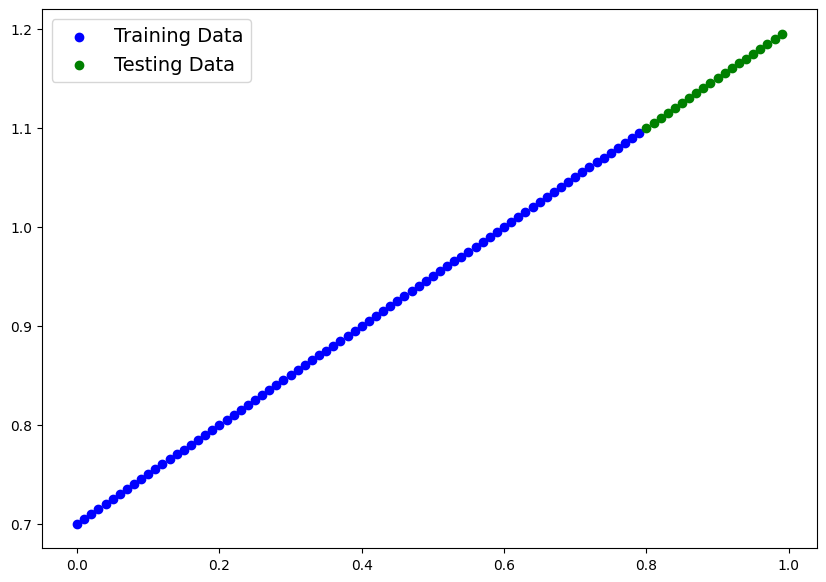

In [159]:
# Data Visualization
def plotPredictions(trainData = XTrain, 
                    trainLabels = yTrain, 
                    testData = XTest, 
                    testLabels = yTest, 
                    prediction = None):
# Plots training data, test data and comparing predictions

    plt.figure(figsize = (10, 7)) 
    
    plt.scatter(trainData, trainLabels, c = "b", label = "Training Data")

    plt.scatter(testData, testLabels, c = "g", label = "Testing Data")

    if prediction is not None:
        plt.scatter(testData, prediction, c = "r", label = "Prediction")

    plt.legend(prop = {"size": 14})


plotPredictions(XTrain, yTrain, XTest, yTest)

#### Building Or Picking A Linear Pytorch Model

In [160]:
# Create a linear model by using the subclass of nn.Module

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() (building a linear regression model, and data is linear) for creating the model parameters (also called linear transform)
        self.linearLayer = nn.Linear(in_features=1, # torch.nn.Linear - applies a linear transformation to the incoming data: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
                                     out_features=1) # input of 1, and output of 1 (based on input and output shape of the data)
                                                     # feature (X) only has one element and the label (y) also has only one element. nn.linear also instantiates the parameters for you
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linearLayer(x)

# setting manual seed 
torch.manual_seed(42)
model1 = LinearRegressionModel()
model1, model1.state_dict()

(LinearRegressionModel(
   (linearLayer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linearLayer.weight', tensor([[0.7645]])),
              ('linearLayer.bias', tensor([0.8300]))]))

In [161]:
# checking the current model device
next(model1.parameters()).device

device(type='cpu')

In [162]:
# Setting the model to use the target device (which was set to cuda when a gpu was available)

model1.to(device)

next(model1.parameters()).device

# Setting data onto the target device
XTrain = XTrain.to(device)
yTrain = yTrain.to(device)

XTest = XTest.to(device)
yTest = yTest.to(device)

#### Model Training
Training:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [163]:
# Setting up Loss Function

lossFunction = nn.L1Loss() # is the same as MAE (mean absolute error)

# setting up optimizer
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr = 0.01)

In [164]:
# writing a training loop
torch.manual_seed(42)

epochs = 500

for epoch in range(epochs):
    model1.train()

    # 1. Forward Pass
    yPredictions = model1(XTrain)

    # 2. Calculate Loss
    loss = lossFunction(yPredictions, yTrain)

    # 3. Optimizer Zero Grad
    optimizer.zero_grad()

    # 4. Perform Backpropagation
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()

    ### Testing
    model1.eval()
    with torch.inference_mode():
        testPrediction = model1(XTest)

        testLoss = lossFunction(testPrediction, yTest)

    # Print out what is happening 
    if epoch % 10 == 0:
        print(f"Epochs: {epoch} | Loss: {loss} | Test Loss: {testLoss}")
        # make sure that both the model and all the data (testing and training of both x and y) are on the same device to avoid errors

Epochs: 0 | Loss: 0.23450064659118652 | Test Loss: 0.3532346785068512
Epochs: 10 | Loss: 0.11889822781085968 | Test Loss: 0.21788227558135986
Epochs: 20 | Loss: 0.04207168519496918 | Test Loss: 0.11362915486097336
Epochs: 30 | Loss: 0.03235318511724472 | Test Loss: 0.0792485699057579
Epochs: 40 | Loss: 0.028751522302627563 | Test Loss: 0.06714033335447311
Epochs: 50 | Loss: 0.025325477123260498 | Test Loss: 0.059148769825696945
Epochs: 60 | Loss: 0.02190040610730648 | Test Loss: 0.05081324651837349
Epochs: 70 | Loss: 0.018474364653229713 | Test Loss: 0.04282166436314583
Epochs: 80 | Loss: 0.015048320405185223 | Test Loss: 0.03483009338378906
Epochs: 90 | Loss: 0.011623254977166653 | Test Loss: 0.026494557037949562
Epochs: 100 | Loss: 0.008197206072509289 | Test Loss: 0.01850295625627041
Epochs: 110 | Loss: 0.004771168809384108 | Test Loss: 0.010511410422623158
Epochs: 120 | Loss: 0.0013778641587123275 | Test Loss: 0.0008424163097515702
Epochs: 130 | Loss: 0.007524845190346241 | Test Lo

In [165]:
model1.state_dict()

OrderedDict([('linearLayer.weight', tensor([[0.5070]], device='cuda:0')),
             ('linearLayer.bias', tensor([0.7048], device='cuda:0'))])

In [166]:
weight, bias

(0.5, 0.7)

#### Making and Visualizing Predictions

In [167]:
# Turn Model into evaluation mode
model1.eval()

# making predictions on the test data
with torch.inference_mode():
    yPredictions = model1(XTest)

yPredictions

tensor([[1.1104],
        [1.1154],
        [1.1205],
        [1.1256],
        [1.1306],
        [1.1357],
        [1.1408],
        [1.1459],
        [1.1509],
        [1.1560],
        [1.1611],
        [1.1661],
        [1.1712],
        [1.1763],
        [1.1813],
        [1.1864],
        [1.1915],
        [1.1966],
        [1.2016],
        [1.2067]], device='cuda:0')

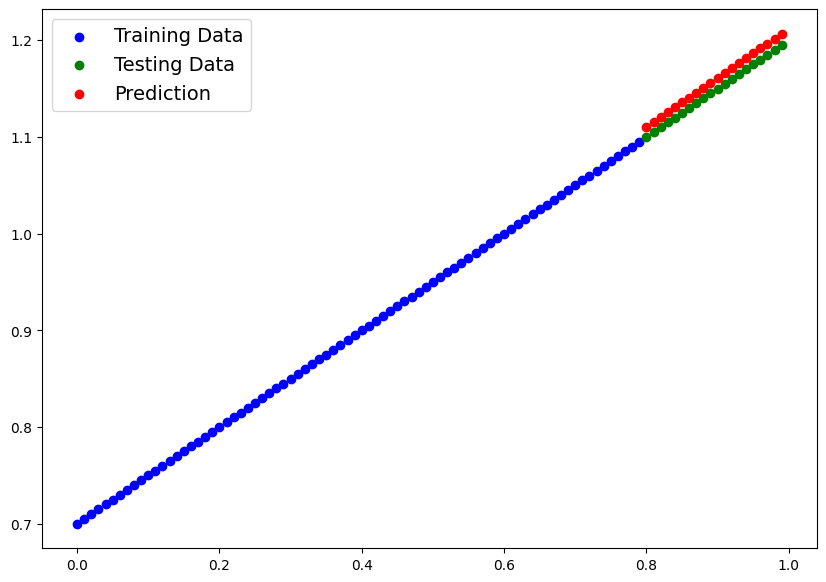

In [168]:
# Visualize model predictions

plotPredictions(prediction=yPredictions.cpu()) # have to call tensor.cpu() in order to set the 

#### Saving and Loading Model

In [169]:
from pathlib import Path

# Creating the models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# Creating a model save path
MODEL_NAME = "Lesson30_Model1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = model1.state_dict(),
           f = MODEL_SAVE_PATH)

Saving Model to: Models\Lesson30_Model1.pth


#### Loading a Pytorch Model

In [170]:
# Loading a Pytorch Model

# Creating a new instance of our linear regression model

loadedModel1 = LinearRegressionModel()

# loading model1 state dictionary
loadedModel1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put loaded model to device
loadedModel1.to(device)

LinearRegressionModel(
  (linearLayer): Linear(in_features=1, out_features=1, bias=True)
)

In [171]:
next(loadedModel1.parameters()).device

device(type='cuda', index=0)

In [172]:
loadedModel1.state_dict()

OrderedDict([('linearLayer.weight', tensor([[0.5070]], device='cuda:0')),
             ('linearLayer.bias', tensor([0.7048], device='cuda:0'))])

In [173]:
# Evaluating Loaded Model

loadedModel1.eval()

with torch.inference_mode():
    loadedModel1Predictions = loadedModel1(XTest)


yPredictions == loadedModel1Predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')